# Лабораторная работа № 2
## Обработка и тарификация трафика NetFlow
---
Вариант 1.  

Для начала, импортируем все необходимые модули

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

Константой обозначим IP пользователя, с которым собираемся работать

In [2]:
IP = '217.15.20.194'

Создадим необходимые функции

In [3]:
def plot_traffic(times, values, format=None, save_to=None):
    fig, ax = plt.subplots(figsize=[15,8])
    ax.plot(times, values)
    myFmt = DateFormatter(format if format is not None else "%H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)
    plt.gcf().autofmt_xdate()
    plt.ylabel('Количество байт в пакете')
    plt.xlabel('Временная шкала')
    plt.title('Зависимость объема трафика от времени')
    if save_to:
        plt.save(save_to)
    else:
        plt.show()

Создадим таблицу данных и обработаем данные для удобства

In [4]:
df = pd.read_csv('lab2.csv', skiprows=1, header=None)
df.columns = ['t', 'sa', 'da', 'ibys', 'obys']
df = df[np.logical_or(df.sa == IP, df.da == IP)]
df.ibys = df.ibys.apply(lambda row: int(row) if 'M' not in row else (int(float(row[:-1])*10**6)))
df.t = df.t.apply(lambda row: row[10:18])
print(f'Всего транзакций c IP = {IP}: {df.shape[0]} шт.')
df.head(3)

Всего транзакций c IP = 217.15.20.194: 4823 шт.


,t,sa,da,ibys,obys
8,11:30:02,173.194.73.95,217.15.20.194,6248,0
14,11:30:02,108.177.14.94,217.15.20.194,4185,0
56,11:30:03,81.19.104.45,217.15.20.194,136,0


Посчитаем входящий и исходящий трафик

In [5]:
outgoing_traffic = df[df.sa == IP].obys.sum() / 10**6
ingoing_traffic =  df[df.da == IP].ibys.sum() / 10**6

print(f'Исходящий трафик составил {outgoing_traffic:0.2f} Мб.')
print(f'Входящий трафик составил {ingoing_traffic:.02f} Мб.')

Исходящий трафик составил 0.00 Мб.
Входящий трафик составил 176.81 Мб.


Построим график зависимости объема трафика от времени.  
Вдоль оси Ох будем брать время в формате _hh:dd:mm_.

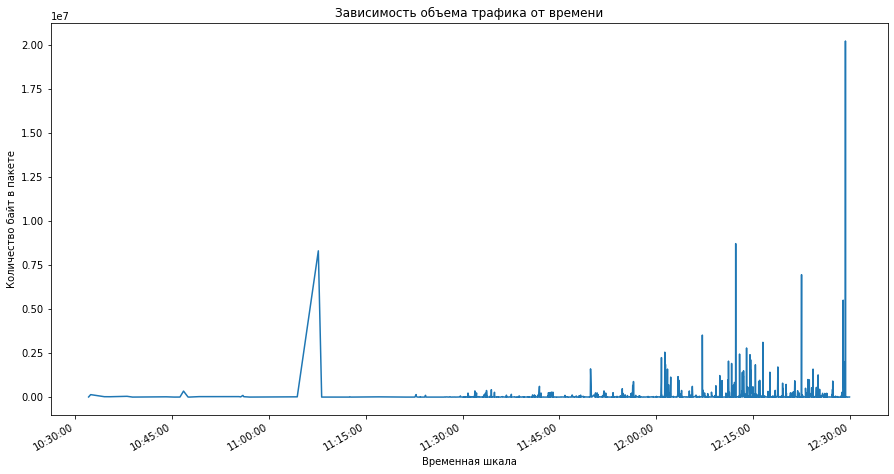

In [6]:
times = np.sort(df.t.unique())
values = []
for t in times:
    values.append(df.loc[df.t == t, ['ibys', 'obys']].sum().sum())

plot_traffic(pd.to_datetime(times), values)

Здесь видно, что график не выглядит достаточно информативным. Имеющихся данных недостаточно для построения зависимости объёма трафика от времени в каждую секунду. Попробуем усреднить данные и построить график зависимости объёма трафика от времени поминутно.

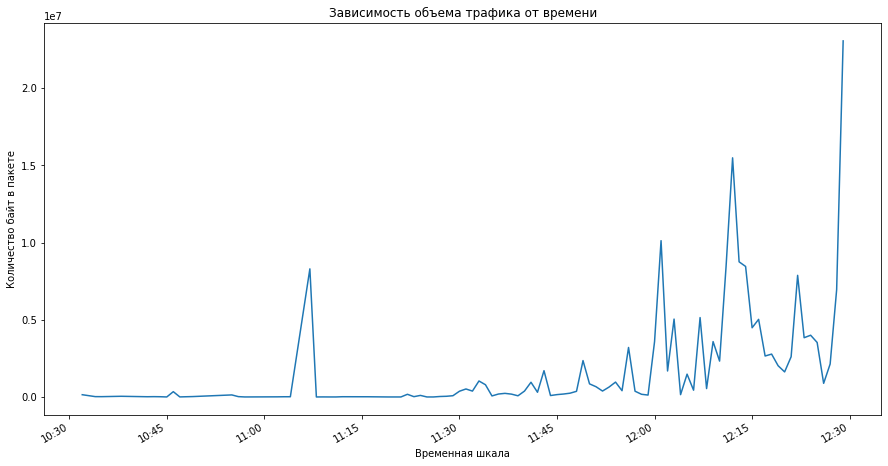

In [7]:
hm = df.t.apply(lambda row: row[:5])
times_hm = np.sort(hm.unique())
values_hm = []
for t in times_hm:
    values_hm.append(df.loc[hm == t, ['ibys', 'obys']].sum().sum())

plot_traffic(pd.to_datetime(times_hm), values_hm, format="%H:%M")

Проведем тарификацию с коэффициентом k: 0,5руб/Мб

In [8]:
k = 0.5
print(f'Счет за входящий трафик: {k * ingoing_traffic:.2f} р.')
print(f'Счет за исходящий трафик: {k * outgoing_traffic:.2f} р.')

Счет за входящий трафик: 88.40 р.
Счет за исходящий трафик: 0.00 р.
